In [91]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
df = pd.read_csv('Sleep_Efficiency.csv')

In [92]:
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [93]:
df = df.dropna()

In [94]:
df.columns = df.columns.str.lower().str.replace(' ','_')
print(df.columns)

Index(['id', 'age', 'gender', 'bedtime', 'wakeup_time', 'sleep_duration',
       'sleep_efficiency', 'rem_sleep_percentage', 'deep_sleep_percentage',
       'light_sleep_percentage', 'awakenings', 'caffeine_consumption',
       'alcohol_consumption', 'smoking_status', 'exercise_frequency'],
      dtype='object')


In [95]:
df = df.drop(columns=["id", "gender", "bedtime", "wakeup_time", "smoking_status", 'age', 'sleep_duration','caffeine_consumption'])

<Axes: >

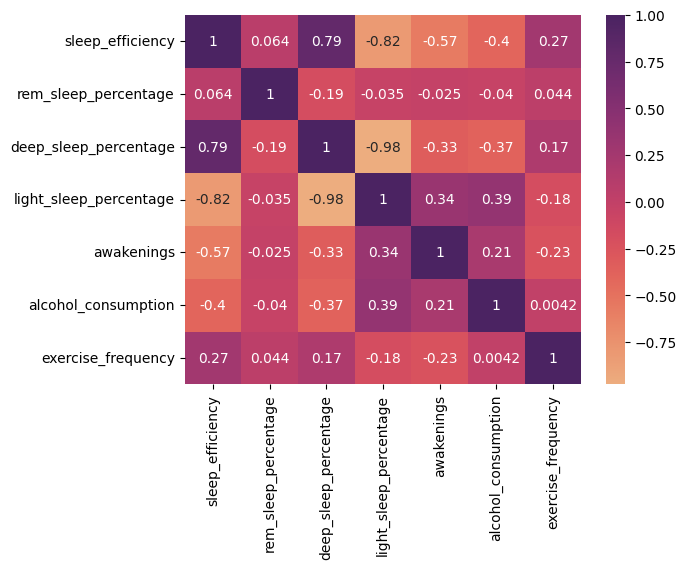

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

correlations = df.corr()
sns.heatmap(correlations, annot=True, cmap='flare', center=0)

[191634.62450592784, 23467.85616832192, 19173.037664070256, 10522.322256665864, 8928.218050960719, 8272.823905697318, 7037.755911693433, 6066.648961802475, 5453.70549912077, 5106.418975527066]


Text(0.5, 1.0, 'Elbow method')

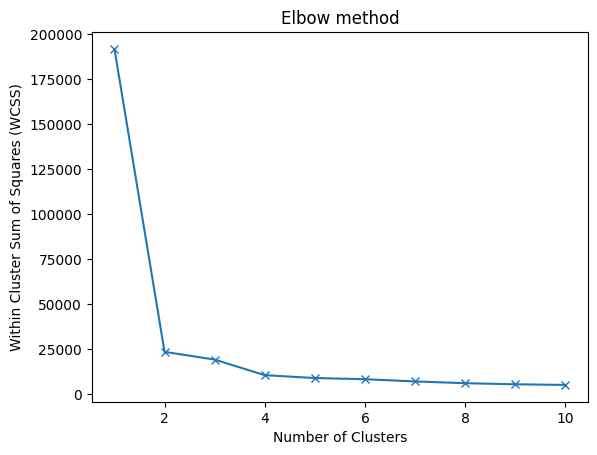

In [97]:
wcss_list = []

for i in range(1,11):  # 1,2,3,4,5,6,7,8,9,10
    cluster_model = KMeans(n_clusters=i, random_state=42).fit(df)
    wcss_list.append(cluster_model.inertia_)

print(wcss_list)

import matplotlib.pyplot as plt
plt.plot(range(1,11), wcss_list, marker='x')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares (WCSS)')
plt.title('Elbow method')

In [98]:
cluster_model_1 = KMeans(n_clusters=2, random_state=42).fit(df)

In [99]:
pd.Series(cluster_model_1.labels_).value_counts()

1    292
0     96
Name: count, dtype: int64

In [100]:
df_label_0 = df[cluster_model_1.labels_==0] 
df_label_1 = df[cluster_model_1.labels_==1]  
#df_label_2 = df[cluster_model_1.labels_==2] 
#df_label_3 = df[cluster_model_1.labels_==3]


In [101]:
df_label_0.columns

Index(['sleep_efficiency', 'rem_sleep_percentage', 'deep_sleep_percentage',
       'light_sleep_percentage', 'awakenings', 'alcohol_consumption',
       'exercise_frequency'],
      dtype='object')

Text(0, 0.5, 'light_sleep_percentage')

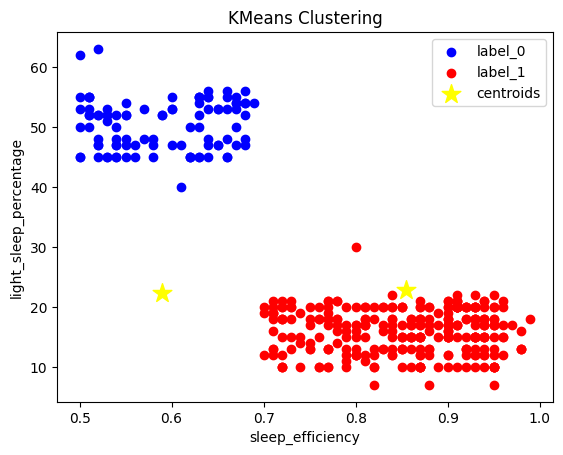

In [102]:
plt.scatter(df_label_0["sleep_efficiency"], df_label_0["light_sleep_percentage"], c="blue")
plt.scatter(df_label_1["sleep_efficiency"], df_label_1["light_sleep_percentage"], c="red")
#plt.scatter(df_label_2["sleep_efficiency"], df_label_2["light_sleep_percentage"], c="green")
#plt.scatter(df_label_3["sleep_efficiency"], df_label_3["light_sleep_percentage"], c="purple")
plt.scatter(cluster_model_1.cluster_centers_[:,0], cluster_model_1.cluster_centers_[:,1], c="yellow", marker="*", s=200)
plt.title("KMeans Clustering")

#plt.legend(['label_0','label_1','label_2', 'label_3', 'centroids'])
plt.legend(['label_0','label_1','centroids'])

plt.title("KMeans Clustering")
plt.xlabel("sleep_efficiency")
plt.ylabel("light_sleep_percentage")

Text(0, 0.5, 'deep_sleep_percentage')

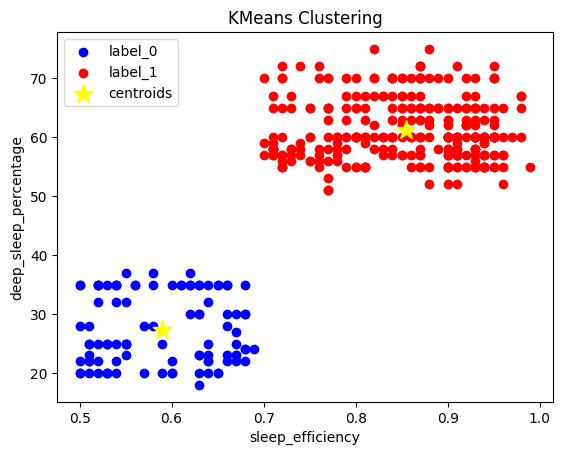

In [103]:
plt.scatter(df_label_0["sleep_efficiency"], df_label_0["deep_sleep_percentage"], c="blue")
plt.scatter(df_label_1["sleep_efficiency"], df_label_1["deep_sleep_percentage"], c="red")
#plt.scatter(df_label_2["sleep_efficiency"], df_label_2["deep_sleep_percentage"], c="green")
#plt.scatter(df_label_3["sleep_efficiency"], df_label_3["deep_sleep_percentage"], c="purple")
plt.scatter(cluster_model_1.cluster_centers_[:,0], cluster_model_1.cluster_centers_[:,2], c="yellow", marker="*", s=200)
#plt.legend(['label_0','label_1','label_2','label_3', 'centroids'])
plt.legend(['label_0','label_1','centroids'])
plt.title("KMeans Clustering")
plt.xlabel("sleep_efficiency")
plt.ylabel("deep_sleep_percentage")

Text(0, 0.5, 'deep_sleep_percentage')

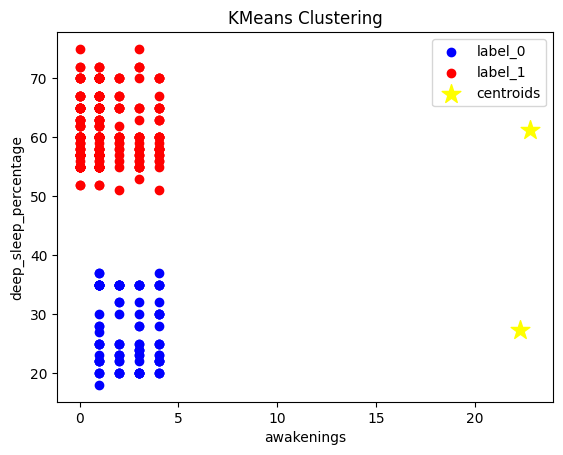

In [104]:
plt.scatter(df_label_0["awakenings"], df_label_0["deep_sleep_percentage"], c="blue")
plt.scatter(df_label_1["awakenings"], df_label_1["deep_sleep_percentage"], c="red")
#plt.scatter(df_label_2["awakenings"], df_label_2["deep_sleep_percentage"], c="green")
#plt.scatter(df_label_3["awakenings"], df_label_3["deep_sleep_percentage"], c="purple")
plt.scatter(cluster_model_1.cluster_centers_[:,1], cluster_model_1.cluster_centers_[:,2], c="yellow", marker="*", s=200)
plt.legend(['label_0','label_1','centroids'])
plt.title("KMeans Clustering")
plt.xlabel("awakenings")
plt.ylabel("deep_sleep_percentage")

Text(0, 0.5, 'alcohol_consumption')

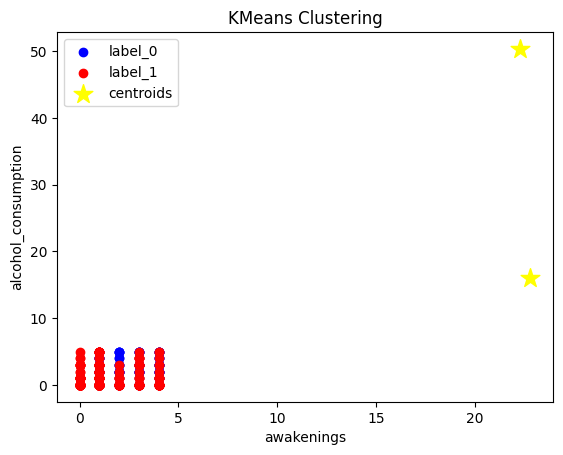

In [105]:
plt.scatter(df_label_0["awakenings"], df_label_0["alcohol_consumption"], c="blue")
plt.scatter(df_label_1["awakenings"], df_label_1["alcohol_consumption"], c="red")
#plt.scatter(df_label_2["awakenings"], df_label_2["alcohol_consumption"], c="green")
#plt.scatter(df_label_3["awakenings"], df_label_3["alcohol_consumption"], c="purple")
plt.scatter(cluster_model_1.cluster_centers_[:,1], cluster_model_1.cluster_centers_[:,3], c="yellow", marker="*", s=200)
plt.legend(['label_0','label_1','centroids'])
plt.title("KMeans Clustering")
plt.xlabel("awakenings")
plt.ylabel("alcohol_consumption")

In [106]:
print("Silhouette Score: ", silhouette_score(df, cluster_model_1.labels_))
print("Calinski Harabasz Score: ", calinski_harabasz_score(df, cluster_model_1.labels_))
print("Davies Bouldin Score: ", davies_bouldin_score(df, cluster_model_1.labels_))


Silhouette Score:  0.7949098393991046
Calinski Harabasz Score:  2766.0120341941524
Davies Bouldin Score:  0.3097958491535008


### **Inferences from the evaluation of k-means model for the dataset "Sleep_Efficiency_csv"**
1. using less no of clusters helped to differentiate the dataset into clear groups for further analysis
2. clearly, 
     - Cluster 0: Lower sleep efficiency, higher light sleep, more awakenings
     - Cluster 1: Higher deep sleep %, higher sleep efficiency, fewer awakenings

3. Features like deep sleep %, light sleep %, sleep efficiency are strong indicators of sleep quality.

## **Only using **Manual coding logic for KMeans Clustering**, identify the clusters in above dataset, and explain your findings.**

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score 
X = df[['sleep_efficiency', 'light_sleep_percentage', 'deep_sleep_percentage']]

k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):  #0, 1, 2
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }
    
    clusters[idx] = cluster
    
clusters

{0: {'center': array([0.06919154, 1.78785042, 1.06183904]), 'points': []},
 1: {'center': array([-0.87041662, -1.11581855,  0.74488834]), 'points': []},
 2: {'center': array([-1.33144319, -0.43023013,  0.47220939]), 'points': []}}

In [108]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [109]:
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []
        
        curr_x = X.iloc[idx]
        
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center
            
            clusters[i]['points'] = []
    return clusters

def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X.iloc[i],clusters[j]['center']))
        pred.append(np.argmin(dist))        
    return pred

clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

In [110]:
print(pred)

[np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)

In [111]:
len(pred)

388

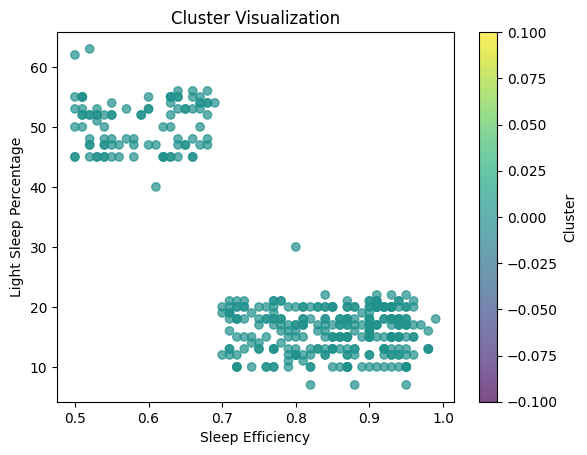

In [112]:
plt.scatter(X['sleep_efficiency'], X['light_sleep_percentage'], c=pred, cmap='viridis', alpha=0.7)
plt.xlabel("Sleep Efficiency")
plt.ylabel("Light Sleep Percentage")
plt.title("Cluster Visualization")
plt.colorbar(label="Cluster")
plt.show()

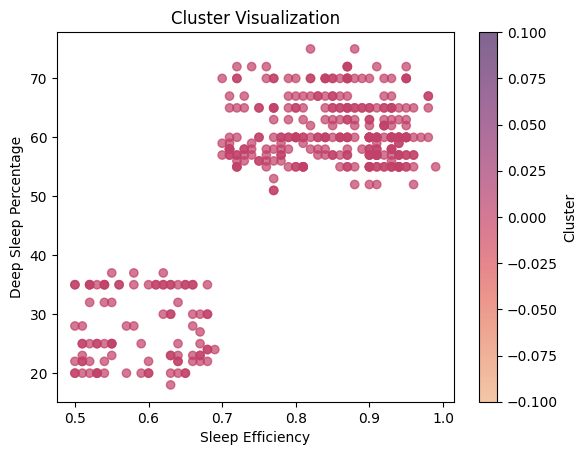

In [113]:
plt.scatter(X['sleep_efficiency'], X['deep_sleep_percentage'], c=pred, cmap='flare', alpha=0.7)
plt.xlabel("Sleep Efficiency")
plt.ylabel("Deep Sleep Percentage")
plt.title("Cluster Visualization")
plt.colorbar(label="Cluster")
plt.show()